# AERO 356-03 Lab 2 Data Analysis

Spacecraft can accumulate large electrical potential differences will in orbit, which can result in arcing between surfaces. The purpose of this study is to investigate arcing in a space like environment. The experiment is split into two parts:

#### Part 1:

Solar panels are tested before and after exposure to different arcing setups while under vacuum. Different metrics are used to evaluate performace such as IV plots, PV plots, and efficiency.

#### Part 2:

An anode and cathode are placed in a vaccuum chamber to determine arcing voltage as a function of pressure distance. Different materials and distances were tested to see how each affected arcing response.


## Part 1:


Relevant nomenclature:

- ABCFO: Anode Biased Cell Facing Out
- ABCFI: Anode Biased Cell Facing In
- CBCFO: Cathode Biased Cell Facing Out
- CBCFI: Cathode Biased Cell Facing In

In [1]:
# external imports
import pandas as pd
import numpy as np
import os

# internal imports
from utils.panel_extractor import PanelDataExtractor

In [2]:
# create panel data path
base_dir = "data"
panel_data = os.path.join(base_dir, "panelData")

# create extractor instance
panel_extractor = PanelDataExtractor().fit_extract(panel_data)

### Current Correction

A current correction is used to account for the temperature that the solar panel is operating in. The correction is given by the following:

$I = I_t - I_0(e^{\frac{qv}{kt}}-1)$

The temperature the day of the experiment was 21 celsius (294.15 kelvin).

In [3]:
panel_extractor.apply_current_adjust(294.15)

### Adding Power

Power is calculated using:

$P = IV$

In [4]:
panel_extractor.add_power()

### Plotting IV Curve 

An IV curve is used to visually show performance of the solar panels. The 'pre' and 'post' data shows performance differences due to solar cell degredation.

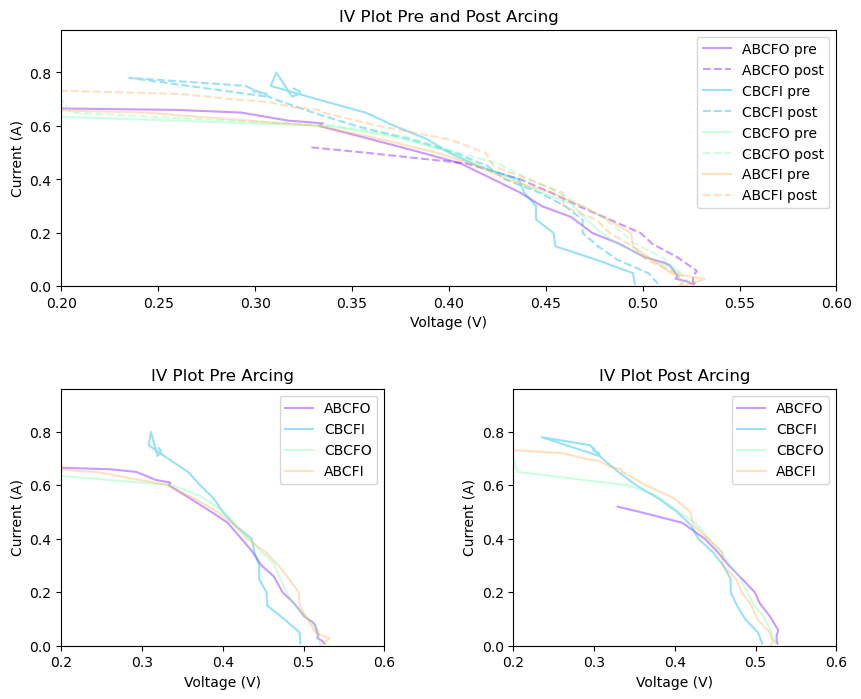

In [5]:
panel_extractor.plot_results(alpha = 0.4, xlim = [.2, .6])

### Plotting PV Curve

Power is another good indicator of performace. The power plotted against the voltage is another way to view any performance loss due to arcing damage.

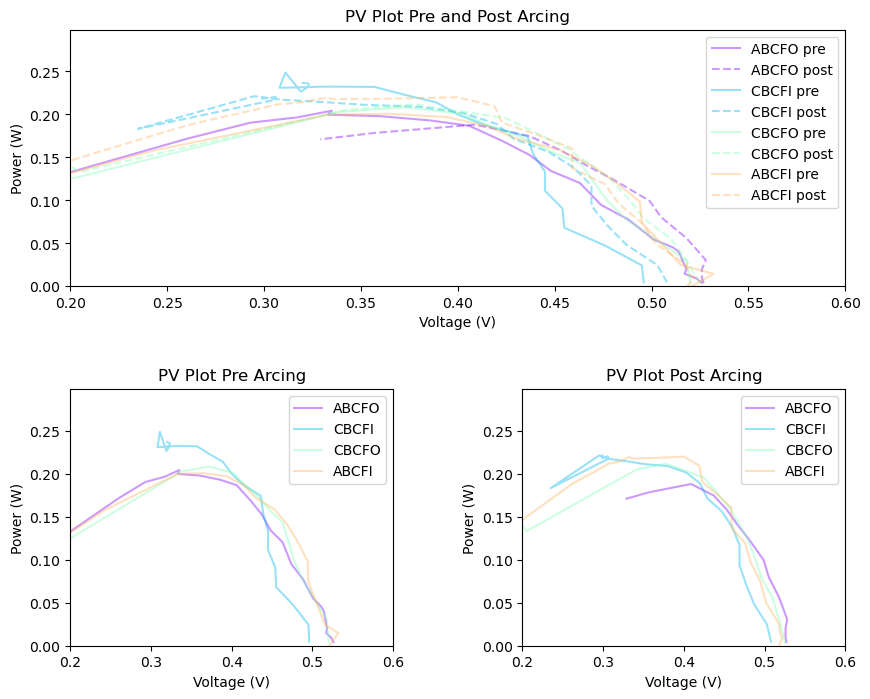

In [6]:
panel_extractor.plot_results(alpha = 0.4, xlim = [.2, .6], x = 'voltage', y = 'power',
                             labels = ["Voltage (V)", "Power (W)"], plot_type = 'PV')

### Panel Efficiency

Panel efficiency is a measure of how well the solar panel converts solar energy into usable energy. The area of the solar panel and the solar constant (542 W/m2 at the time of experiment) at the surface are used to calculate theoretical power. This is compared to max possible power to get a ratio. The following formula is used:

$\eta_{max} = \frac{P_{max}}{P_{in}}$

In [7]:
panel_extractor.calculate_efficiency(542)

,Test,Pre Arcing,Post Arcing
0,ABCFO,0.157095,0.144628
1,CBCFI,0.191267,0.170095
2,CBCFO,0.160146,0.162729
3,ABCFI,0.154327,0.169122


## Part 2:

In [8]:
from utils.arcing_extractor import ArcingDataExtractor

arcing_extractor = ArcingDataExtractor()

In [9]:
# create arcing data path
arcing_data = os.path.join(base_dir, 'arcingData')

# fit and extract data
arcing_extractor.fit_extract(arcing_data)

### Paschen's Curve

Voltage and pressure distance was used to explore when arcing occurs at different conditions. The materials and distances (between anode and cathode) tested were as follows:

- Al: Aluminum at 0.5 inches
- C: Copper at 0.5 inches
- SS: Stainless Steel at 0.5 inches
- SS2D: Stainless Steel at 1 inch

The results from the experiment are shown below:

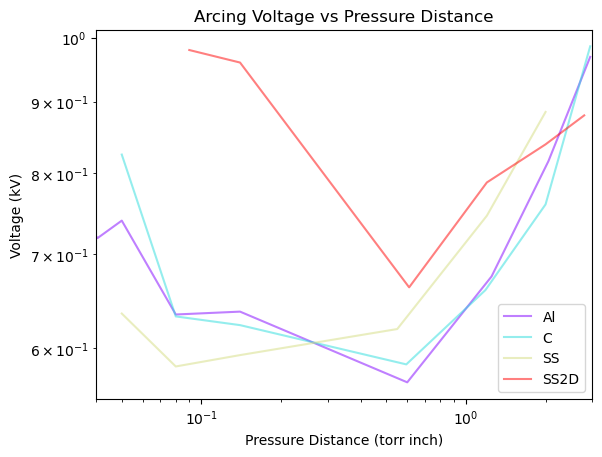

In [10]:
arcing_extractor.plot_results(xlim=[4e-2, 3], alpha = 0.5)

Further analysis, methodology, and conclusions are included in the lab write up.